<a href="https://colab.research.google.com/github/lucaskrlima/analise-cadeia-suprimentos/blob/main/open_food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

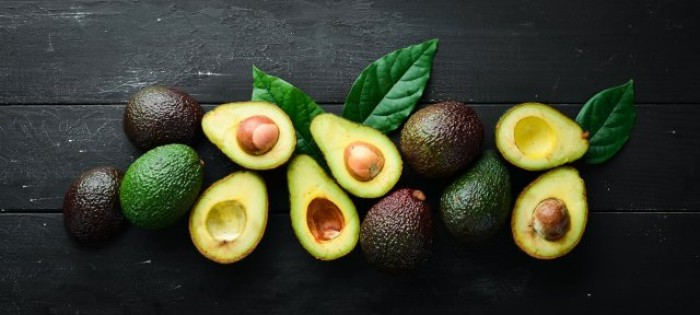

**O que há em uma torrada de abacate: uma análise da cadeia de suprimentos Inglesa**

A torrada com abacate, um prato rápido de fazer ganhou popularidade nos cardápios de café da manhã desde a década de 2010. Uma torrada simples de abacate amassado que é feita com cinco ingredientes: um abacate maduro, meio limão, uma pitada grande de sal em flocos, duas fatias de pão fermentado e um bom fio de azeite virgem extra. A maioria desses ingredientes sempre estão prontamente disponível em supermercados.
Neste projeto, o objetivo e realizar uma análise da cadeia de suprimentos de três desses ingredientes usados em uma torrada de abacate, utilizando o banco de dados Open Food Facts. Este banco de dados contém informações extensas e de fonte aberta sobre vários alimentos, incluindo suas origens. Através desta análise, vou buscar uma compreensão profunda da complexa cadeia de abastecimento envolvida na produção de um único prato.



In [6]:
#Importando pandas e lendo os dados sobre avocado
#A base de dados é delimitada por tabulações por isso o uso de sep='\t'
import pandas as pd
avocado = pd.read_csv('/content/avocado.csv', sep='\t')

In [7]:
#Visualizando os dados iniciais
avocado.head()

,code,lc,product_name_de,product_name_el,product_name_en,product_name_es,product_name_fi,product_name_fr,product_name_id,product_name_it,...,off:ecoscore_data.adjustments.packaging.non_recyclable_and_non_biodegradable_materials,off:ecoscore_data.adjustments.production_system.value,off:ecoscore_data.adjustments.threatened_species.value,sources_fields:org-database-usda:available_date,sources_fields:org-database-usda:fdc_category,sources_fields:org-database-usda:fdc_data_source,sources_fields:org-database-usda:fdc_id,sources_fields:org-database-usda:modified_date,sources_fields:org-database-usda:publication_date,data_sources
0,0059749979702,fr,NaN,NaN,NaN,NaN,NaN,Naturalia Avocado Oil,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps"
1,7610095131409,en,NaN,NaN,NaN,NaN,NaN,Avocado Bowl chips,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - Yuka, Apps, Producers, Producer - zweifel"
2,4005514005578,en,NaN,NaN,Gelbe Linse Avocado Brotaufstrich,NaN,NaN,NaN,NaN,NaN,...,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps, App - smoothie-openfoodfacts"
3,0879890002513,en,NaN,NaN,Avocado toast chili lime,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - Yuka, Apps, App - InFood"
4,0223086613685,en,NaN,NaN,Avocado,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - Yuka, Apps"


In [8]:
#Verificando colunas com valores ausentes
avocado.isna().sum()

code                                                    0
lc                                                      0
product_name_de                                      1684
product_name_el                                      1784
product_name_en                                       512
                                                     ... 
sources_fields:org-database-usda:fdc_data_source     1469
sources_fields:org-database-usda:fdc_id              1469
sources_fields:org-database-usda:modified_date       1469
sources_fields:org-database-usda:publication_date    1469
data_sources                                          105
Length: 184, dtype: int64

Colunas selecionadas para análise:

 * code = codigo
 * lc   = sigla
 * product_name_en = nome_prod_en
 * quantity = quantidade
 * serving_size = porcao
 * packaging_tags = tags_embalagem
 * brands = marca
 * brands_tags = tags_marcas
 * categories_tags = tags_categoria
 * labels_tags = tags_etiqueta
 * countries = pais
 * countries_tags = tags_pais
 * origins = origem
 * origins_tags = tags_origem

In [9]:
#Renomeando colunas
avocado = avocado.rename(columns={
    'code':'codigo',
    'lc':'sigla',
    'product_name_en':'nome_prod_en',
    'quantity':'quantidade',
    'serving_size':'porcao',
    'packaging_tags':'tags_embalagem',
    'brands':'marca',
    'brands_tags':'tags_marca',
    'categories_tags':'tags_categoria',
    'labels_tags':'tags_etique',
    'countries':'pais',
    'countries_tags':'tags_pais',
    'origins':'origem',
    'origins_tags':'tags_origem'
})

In [10]:
#Visualizando dados do cabeçalho com as colunas renomeadas
avocado.head()

,codigo,sigla,product_name_de,product_name_el,nome_prod_en,product_name_es,product_name_fi,product_name_fr,product_name_id,product_name_it,...,off:ecoscore_data.adjustments.packaging.non_recyclable_and_non_biodegradable_materials,off:ecoscore_data.adjustments.production_system.value,off:ecoscore_data.adjustments.threatened_species.value,sources_fields:org-database-usda:available_date,sources_fields:org-database-usda:fdc_category,sources_fields:org-database-usda:fdc_data_source,sources_fields:org-database-usda:fdc_id,sources_fields:org-database-usda:modified_date,sources_fields:org-database-usda:publication_date,data_sources
0,0059749979702,fr,NaN,NaN,NaN,NaN,NaN,Naturalia Avocado Oil,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps"
1,7610095131409,en,NaN,NaN,NaN,NaN,NaN,Avocado Bowl chips,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - Yuka, Apps, Producers, Producer - zweifel"
2,4005514005578,en,NaN,NaN,Gelbe Linse Avocado Brotaufstrich,NaN,NaN,NaN,NaN,NaN,...,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - yuka, Apps, App - smoothie-openfoodfacts"
3,0879890002513,en,NaN,NaN,Avocado toast chili lime,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - Yuka, Apps, App - InFood"
4,0223086613685,en,NaN,NaN,Avocado,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"App - Yuka, Apps"


In [11]:
#Criando um subset com as colunas defindas para análise
subset_colunas_analise = ['codigo', 'sigla', 'nome_prod_en', 'quantidade', 'porcao', 'tags_embalagem',
                          'marca', 'tags_marca', 'tags_categoria', 'tags_etique', 'pais', 'tags_pais',
                          'origem', 'tags_origem']

In [12]:
#Incluindo o subset no dataframe original
avocado = avocado[subset_colunas_analise]
avocado.head()

,codigo,sigla,nome_prod_en,quantidade,porcao,tags_embalagem,marca,tags_marca,tags_categoria,tags_etique,pais,tags_pais,origem,tags_origem
0,0059749979702,fr,NaN,NaN,NaN,NaN,Naturalia,naturalia,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Canada,en:canada,NaN,NaN
1,7610095131409,en,NaN,NaN,NaN,NaN,Zweifel,zweifel,"en:snacks,en:salty-snacks,en:appetizers,en:chi...","en:vegetarian,en:vegan","Switzerland, World","en:switzerland,en:world",NaN,NaN
2,4005514005578,en,Gelbe Linse Avocado Brotaufstrich,NaN,NaN,NaN,Tartex,tartex,de:abendbrotsufstrich,"en:organic,en:eu-organic,en:eg-oko-verordnung",Germany,en:germany,NaN,NaN
3,0879890002513,en,Avocado toast chili lime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,NaN,NaN
4,0223086613685,en,Avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,NaN,NaN


In [13]:
#Carregando as tags das categorias mais relevantes de avocado
with open("/content/relevant_avocado_categories.txt", "r") as file:
    lista_categoria_relevante_avocado = file.read().splitlines()
    file.close()

In [14]:
#Filtrando dados por tags_categoria
#Transforma coluna de tags em coluna de lista separado por vírgula
avocado['lista_categoria'] = avocado['tags_categoria'].str.split(',')
avocado.head()

,codigo,sigla,nome_prod_en,quantidade,porcao,tags_embalagem,marca,tags_marca,tags_categoria,tags_etique,pais,tags_pais,origem,tags_origem,lista_categoria
0,0059749979702,fr,NaN,NaN,NaN,NaN,Naturalia,naturalia,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Canada,en:canada,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."
1,7610095131409,en,NaN,NaN,NaN,NaN,Zweifel,zweifel,"en:snacks,en:salty-snacks,en:appetizers,en:chi...","en:vegetarian,en:vegan","Switzerland, World","en:switzerland,en:world",NaN,NaN,"[en:snacks, en:salty-snacks, en:appetizers, en..."
2,4005514005578,en,Gelbe Linse Avocado Brotaufstrich,NaN,NaN,NaN,Tartex,tartex,de:abendbrotsufstrich,"en:organic,en:eu-organic,en:eg-oko-verordnung",Germany,en:germany,NaN,NaN,[de:abendbrotsufstrich]
3,0879890002513,en,Avocado toast chili lime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,NaN,NaN,NaN
4,0223086613685,en,Avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,NaN,NaN,NaN


In [15]:
#Dropando valores nulos na colua lista_categoria
avocado = avocado.dropna(subset='lista_categoria')
avocado.head()

,codigo,sigla,nome_prod_en,quantidade,porcao,tags_embalagem,marca,tags_marca,tags_categoria,tags_etique,pais,tags_pais,origem,tags_origem,lista_categoria
0,0059749979702,fr,NaN,NaN,NaN,NaN,Naturalia,naturalia,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Canada,en:canada,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."
1,7610095131409,en,NaN,NaN,NaN,NaN,Zweifel,zweifel,"en:snacks,en:salty-snacks,en:appetizers,en:chi...","en:vegetarian,en:vegan","Switzerland, World","en:switzerland,en:world",NaN,NaN,"[en:snacks, en:salty-snacks, en:appetizers, en..."
2,4005514005578,en,Gelbe Linse Avocado Brotaufstrich,NaN,NaN,NaN,Tartex,tartex,de:abendbrotsufstrich,"en:organic,en:eu-organic,en:eg-oko-verordnung",Germany,en:germany,NaN,NaN,[de:abendbrotsufstrich]
5,3662994002063,fr,NaN,3 fruits,NaN,NaN,la compagnie des fruits mûrs,la-compagnie-des-fruits-murs,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,France,en:france,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."
6,8437013031011,fr,NaN,1 kg,NaN,NaN,NaN,NaN,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,France,en:france,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."


In [21]:
#Filtrando dataframe com base na coluna lista de categoria
#Cria uma função lambda que retorna linhas de avocado onde lista_categoria contém qualquer um
#dos valores contidos em lista_categoria_relevante_avocado
#o valor retornado é true
avocado = avocado[avocado['lista_categoria'].apply(lambda x: any([i
                                                  for i in x if i in lista_categoria_relevante_avocado]))]

In [22]:
avocado.head()

,codigo,sigla,nome_prod_en,quantidade,porcao,tags_embalagem,marca,tags_marca,tags_categoria,tags_etique,pais,tags_pais,origem,tags_origem,lista_categoria
5,3662994002063,fr,NaN,3 fruits,NaN,NaN,la compagnie des fruits mûrs,la-compagnie-des-fruits-murs,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,France,en:france,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."
6,8437013031011,fr,NaN,1 kg,NaN,NaN,NaN,NaN,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,France,en:france,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."
14,4016249238155,de,NaN,135g,100g,de:gläschen,Allos,allos,"en:plant-based-foods-and-beverages,en:plant-ba...","en:organic,en:vegetarian,en:eu-organic,en:no-g...",Deutschland,en:germany,Europäische Union,en:european-union,"[en:plant-based-foods-and-beverages, en:plant-..."
17,8718963381532,de,NaN,NaN,NaN,NaN,NaN,NaN,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,Deutschland,en:germany,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."
23,8436002746707,es,NaN,NaN,NaN,NaN,NaN,NaN,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,España,en:spain,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."


Quais os lugares que mais fornecem Avocado para o Reino Unido (UK)?

In [30]:
#Criando um filtro o reino unido
avocado_uk = avocado[(avocado['pais']=='United Kingdom')]

In [31]:
avocado_uk.head()

,codigo,sigla,nome_prod_en,quantidade,porcao,tags_embalagem,marca,tags_marca,tags_categoria,tags_etique,pais,tags_pais,origem,tags_origem,lista_categoria
361,00985833,en,Avacado,650 g,NaN,NaN,Marks & Spencer,marks-spencer,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,United Kingdom,en:united-kingdom,Peru,en:peru,"[en:plant-based-foods-and-beverages, en:plant-..."
381,00040464,en,Avocado,NaN,NaN,NaN,NaN,NaN,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,United Kingdom,en:united-kingdom,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."
414,4088600100173,en,Avocado,100 g,NaN,en:mixed-plastic-unknown,Aldi,aldi,"en:plant-based-foods-and-beverages,en:plant-ba...",NaN,United Kingdom,en:united-kingdom,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."
468,01307351,en,Avacados organic,NaN,NaN,"en:card-tray,en:ldpe-bag",Sainsbury’s SO organic,sainsbury-s-so-organic,"en:plant-based-foods-and-beverages,en:plant-ba...","en:organic,en:eu-organic,en:non-eu-agriculture...",United Kingdom,en:united-kingdom,NaN,NaN,"[en:plant-based-foods-and-beverages, en:plant-..."
508,5057172125395,en,Just Essentials Avocados,4pack,NaN,en:mixed-plastic-film-packet-to-recycle,Asda,asda,"en:plant-based-foods-and-beverages,en:plant-ba...","en:class-i,en:contains-stones",United Kingdom,en:united-kingdom,Peru,en:peru,"[en:plant-based-foods-and-beverages, en:plant-..."


In [19]:
#Obtendo a origem do pais com a contagem mais alta
avocado_origem = (avocado_uk['tags_origem'].value_counts().index[0])
avocado_origem = avocado_origem.lstrip("en:")

In [33]:
avocado_origem

'peru'

In [37]:
#Função criada para fazer a leitura e filtragem de dados de outros ingredientes
#Função retorna o pais de origem dos ingredientes
def leitura_filtro_dados(filename, lista_categoria_relevante):
  df = pd.read_csv('/content/' + filename, sep='\t')

  #Renomeia Colunaas
  df = df.rename(columns={
    'code':'codigo',
    'lc':'sigla',
    'product_name_en':'nome_prod_en',
    'quantity':'quantidade',
    'serving_size':'porcao',
    'packaging_tags':'tags_embalagem',
    'brands':'marca',
    'brands_tags':'tags_marca',
    'categories_tags':'tags_categoria',
    'labels_tags':'tags_etique',
    'countries':'pais',
    'countries_tags':'tags_pais',
    'origins':'origem',
    'origins_tags':'tags_origem'
    })

  # Cria um subset com as colunas definidas
  subset_colunas = ['codigo', 'sigla', 'nome_prod_en', 'quantidade', 'porcao', 'tags_embalagem',
                    'marca', 'tags_marca', 'tags_categoria', 'tags_etique', 'pais', 'tags_pais',
                    'origem', 'tags_origem']
  df = df[subset_colunas]

  # Divida tags_categoria em lista_categoria
  df['lista_categoria'] = df['tags_categoria'].str.split(',')

  # Drop linhas nulas em lista_categoria
  df = df.dropna(subset = 'lista_categoria')

  # Filtra os dados categoria relevante
  df = df[df['lista_categoria'].apply(lambda x: any([i for i in x if i in lista_categoria_relevante]))]

  # Filtro os dados de Reino Unido
  df_uk = df[(df['pais']=='United Kingdom')]

  # Faz a contagem da tags_origem e encontra a mais alta
  top_origem_string = (df_uk['tags_origem'].value_counts().index[0])

  # Limpa a string de país de origem
  top_origem_pais = top_origem_string.lstrip("en:")
  top_origem_pais = top_origem_pais.replace('-', ' ')

  #Printa o resultado
  print(f'**{filename[:-4]} origem**','\n', top_origem_pais, '\n')

  print ("Top origem país: ", top_origem_pais)
  print ("\n")

  # Retorna o top origem pais
  return top_origem_pais


In [41]:
### Repetindo o processo para os outros dois ingredientes
#Oleo de oliva e fermento

# Reunindo dados relevantes de oleo de oliva
with open('/content/relevant_olive_oil_categories.txt', 'r') as file:
    categoria_relevante_oleo_oliva = file.read().splitlines()
    file.close()

In [42]:
# Chamando a função de leitura e filtro e passando dataset de oleo de oliva
top_origem_oleo_oliva = leitura_filtro_dados('olive_oil.csv', categoria_relevante_oleo_oliva)

<ipython-input-37-30eab1e3406c>:4: DtypeWarning: Columns (0,1,2,4,5,6,7,8,10,13,15,16,17,18,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,42,43,44,45,46,48,49,50,57,67,70,71,72,73,74,75,76,79,80,81,82,83,86,87,88,89,90,91,92,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,115,121,125,129,133,137,141,145,149,153,157,159,161,165,167,169,177,179,181,183,185,187,189,191,193,195,197,199,201,203,205,211,213,215,217,219,221,223,225,227,229,231,233,235,237,239,241,243,245,247,249,251,253,255,257,259,261,263,265,267,269,271,273,274,275,276,277,278,279,280,281,282,283,284,285,286,288,289,290,291,292,293,294,305,311,312,313,315,316,319,320,321,322,324) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/' + filename, sep='\t')


**olive_oil origem** 
 greece 

Top origem país:  greece




In [43]:
# Reunindo dados relevantes do ingrediente fermento
with open('/content/relevant_sourdough_categories.txt', 'r') as file:
    categoria_relevante_fermento = file.read().splitlines()
    file.close()

# Chamando a função leitura e filtro e passando dataset de fermento
top_origem_fermento = leitura_filtro_dados('sourdough.csv',categoria_relevante_fermento)


**sourdough origem** 
 united kingdom 

Top origem país:  united kingdom




In [38]:
#Usando a função leitura e fitro nos dados de avocado
top_avocado_origem = leitura_filtro_dados('avocado.csv', lista_categoria_relevante_avocado)

**avocado origem** 
 peru 

Top origem país:  peru




Concluindo nossa análise, podemos concluir que para o ingrediente principal o Avocado o país com maior quantidade de fornecimento é o Peru que atualmente é um exportador emergente devido a investimentos bem sucedidos e o clima favorável.

A Grécia é o terceiro país exportador de óleo de oliva do mundo, com uma predominância em cor, aroma e sabor o que mostra que é bem aceita pelos Inglesas, fazendo que a Grécia seja seu principal fornecedor deste ingrediente.

O fermento terceiro e ultimo ingrediente apontado na análise se mostrou óbvia pois sua principal matéria prima é a batata inglesa, o Reino Unido tem o maior indice de fornecimento do mesmo.